In [1]:
# import modules
import pandas as pd
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy.optimize import curve_fit
#resize graphs so they are big
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

Uploading a a csv file.

In [55]:
#df = pd.read_csv('F0000CH1.csv', header = None)
#df2 = pd.read_csv('F0000CH2.csv', header = None)
df = pd.read_csv (r'C:\Users\kimbugwef\Desktop\University\senior\Advanced lab\Advanced lab\speed_light_data\ALL0006\F0006CH1.csv', header = None)
df2 = pd.read_csv (r'C:\Users\kimbugwef\Desktop\University\senior\Advanced lab\Advanced lab\speed_light_data\ALL0006\F0006CH2.csv', header = None)
print(df2)

                    0                   1   2             3     4   5
0       Record Length        2.500000e+03 NaN -1.600000e-07 -1.26 NaN
1     Sample Interval        4.000000e-10 NaN -1.596000e-07 -1.26 NaN
2       Trigger Point  4.000000000000e+02 NaN -1.592000e-07 -1.26 NaN
3                 NaN                 NaN NaN -1.588000e-07 -1.26 NaN
4                 NaN                 NaN NaN -1.584000e-07 -1.24 NaN
...               ...                 ...  ..           ...   ...  ..
2495              NaN                 NaN NaN  8.380000e-07  0.92 NaN
2496              NaN                 NaN NaN  8.384000e-07  0.92 NaN
2497              NaN                 NaN NaN  8.388000e-07  0.92 NaN
2498              NaN                 NaN NaN  8.392000e-07  0.92 NaN
2499              NaN                 NaN NaN  8.396000e-07  0.92 NaN

[2500 rows x 6 columns]


In [56]:
Time = df[3] # selecting the time row from the column
Time2 = df2[3]

Voltage = df[4] # selecting the voltage 
Voltage2 = df2[4] # selecting the voltage

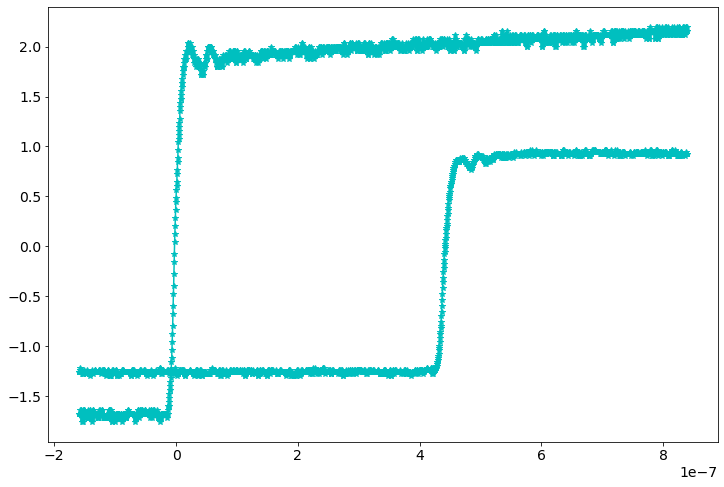

In [57]:
plt.plot(Time, Voltage, '*-c')
plt.plot(Time2, Voltage2, '*-c')

In [58]:
data= {"Time":Time, 'Voltage':Voltage,'Voltage2':Voltage2}
df = pd.DataFrame(data=data)
df


,Time,Voltage,Voltage2
0,-1.600000e-07,-1.68,-1.26
1,-1.596000e-07,-1.68,-1.26
2,-1.592000e-07,-1.68,-1.26
3,-1.588000e-07,-1.68,-1.26
4,-1.584000e-07,-1.68,-1.24
...,...,...,...
2495,8.380000e-07,2.20,0.92
2496,8.384000e-07,2.20,0.92
2497,8.388000e-07,2.16,0.92
2498,8.392000e-07,2.16,0.92


In [41]:
"""#just some imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# load data

# normalization before ACF
def normalize(data):
    return (data - np.mean(data, axis=0).reshape((1, -11))) / (np.std(data, axis=0).reshape((1, -1)))


# select subset of columns, seems relevant as a group
SCOLS = ['Voltage','Voltage2']

# just to see the data
f = plt.figure()
ax = f.add_subplot(111)
df[SCOLS[:2]].iloc[::10].plot(ax=ax)
ax.set_title('Raw data')

# normalization
normalized = normalize(df[SCOLS].values)
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(np.arange(normalized.shape[0]),normalized[:,0], label='TW_A1')
ax.plot(np.arange(normalized.shape[0]),normalized[:,1], label='W_A1')
ax.set_title('Normalized')

# ACF between two components
x1x2 = np.correlate(normalized[:, 0], normalized[:, 1], 'full')

# see the results
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(x1x2)
ax.set_title('ACF')

# mainloop
plt.show()"""

"#just some imports\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\nplt.style.use('ggplot')\n\n# load data\n\n# normalization before ACF\ndef normalize(data):\n    return (data - np.mean(data, axis=0).reshape((1, -11))) / (np.std(data, axis=0).reshape((1, -1)))\n\n\n# select subset of columns, seems relevant as a group\nSCOLS = ['Voltage','Voltage2']\n\n# just to see the data\nf = plt.figure()\nax = f.add_subplot(111)\ndf[SCOLS[:2]].iloc[::10].plot(ax=ax)\nax.set_title('Raw data')\n\n# normalization\nnormalized = normalize(df[SCOLS].values)\nf = plt.figure()\nax = f.add_subplot(111)\nax.plot(np.arange(normalized.shape[0]),normalized[:,0], label='TW_A1')\nax.plot(np.arange(normalized.shape[0]),normalized[:,1], label='W_A1')\nax.set_title('Normalized')\n\n# ACF between two components\nx1x2 = np.correlate(normalized[:, 0], normalized[:, 1], 'full')\n\n# see the results\nf = plt.figure()\nax = f.add_subplot(111)\nax.plot(x1x2)\nax.set_title('ACF')\n\n# mainloop

In [59]:
data2= {"Time2":Time2, 'Voltage2':Voltage2}
df2 = pd.DataFrame(data=data2)
df2

,Time2,Voltage2
0,-1.600000e-07,-1.26
1,-1.596000e-07,-1.26
2,-1.592000e-07,-1.26
3,-1.588000e-07,-1.26
4,-1.584000e-07,-1.24
...,...,...
2495,8.380000e-07,0.92
2496,8.384000e-07,0.92
2497,8.388000e-07,0.92
2498,8.392000e-07,0.92


In [60]:
df['new_col'] = df['Voltage'].rolling(80).mean()
df.head(6)
df

,Time,Voltage,Voltage2,new_col
0,-1.600000e-07,-1.68,-1.26,NaN
1,-1.596000e-07,-1.68,-1.26,NaN
2,-1.592000e-07,-1.68,-1.26,NaN
3,-1.588000e-07,-1.68,-1.26,NaN
4,-1.584000e-07,-1.68,-1.24,NaN
...,...,...,...,...
2495,8.380000e-07,2.20,0.92,2.1560
2496,8.384000e-07,2.20,0.92,2.1570
2497,8.388000e-07,2.16,0.92,2.1575
2498,8.392000e-07,2.16,0.92,2.1575


In [61]:
df2['new_col2'] = df2['Voltage2'].rolling(80).mean()
df2.head(6)
df2

,Time2,Voltage2,new_col2
0,-1.600000e-07,-1.26,NaN
1,-1.596000e-07,-1.26,NaN
2,-1.592000e-07,-1.26,NaN
3,-1.588000e-07,-1.26,NaN
4,-1.584000e-07,-1.24,NaN
...,...,...,...
2495,8.380000e-07,0.92,0.924
2496,8.384000e-07,0.92,0.924
2497,8.388000e-07,0.92,0.924
2498,8.392000e-07,0.92,0.924


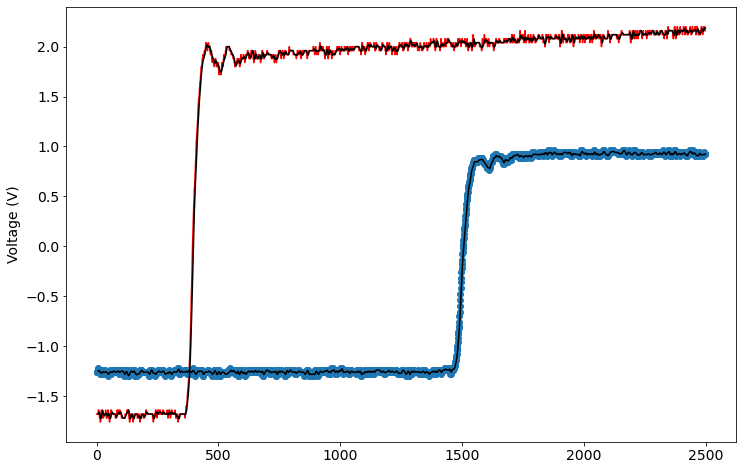

In [62]:
plt.plot(df['Voltage'], 'r-')
plt.plot(df2['Voltage2'], 'o-')
plt.ylabel('Voltage (V)')

# original version
# smooth_data = pd.rolling_mean(ts,5).plot(style='k')
# pandas has changed; so, here's the new version:
smooth_data = pd.Series(df['Voltage']).rolling(window=7).mean().plot(style='k')
smooth_data2 = pd.Series(df2['Voltage2']).rolling(window=7).mean().plot(style='k')
plt.show()

In [187]:
for i in df['Voltage']:
    if i > 1.5:
        t = df['Time']
        print (t[i])

KeyError: 1.52

In [165]:
signal1 = pd.Series(df['Voltage']).rolling(window=7).mean()

signal2 = pd.Series(df2['Voltage2']).rolling(window=7).mean()

In [173]:
def rfft_xcorr(x, y):
    M = len(x) + len(y) - 1
    N = 2 ** int(np.ceil(np.log2(M)))
    X = np.fft.rfft(x, N)
    Y = np.fft.rfft(y, N)
    cxy = np.fft.irfft(X * np.conj(Y))
    cxy = np.hstack((cxy[:len(x)], cxy[N-len(y)+1:]))
    return cxy

In [175]:
x = signal1
y = signal2
rfft_xcorr(x, y)

array([nan, nan, nan, ..., nan, nan, nan])

In [176]:
from scipy import signal, fftpack

def get_max_correlation(original, match):
    z = signal.fftconvolve(original, match[::-1])
    lags = np.arange(z.size) - (match.size - 1)
    return ( lags[np.argmax(np.abs(z))] )

In [177]:
get_max_correlation(signal1, signal2)

-2499

In [ ]:
just some imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# load data

# normalization before ACF
def normalize(data):
    return (data - np.mean(data, axis=0).reshape((1, -11))) / (np.std(data, axis=0).reshape((1, -1)))


# select subset of columns, seems relevant as a group
SCOLS = ['TW_A1','W_A1']

# just to see the data
f = plt.figure()
ax = f.add_subplot(111)
df[SCOLS[:2]].iloc[::10].plot(ax=ax)
ax.set_title('Raw data')

# normalization
normalized = normalize(df[SCOLS].values)
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(np.arange(normalized.shape[0]),normalized[:,0], label='TW_A1')
ax.plot(np.arange(normalized.shape[0]),normalized[:,1], label='W_A1')
ax.set_title('Normalized')

# ACF between two components
x1x2 = np.correlate(normalized[:, 0], normalized[:, 1], 'full')

# see the results
f = plt.figure()
ax = f.add_subplot(111)
ax.plot(x1x2)
ax.set_title('ACF')

# mainloop
plt.show()

In [154]:
dx =1
n =250
grad1 = (y[n+1]-y[n])/dx
grad2 = (y[n+2]-y[n+1])/dx
def isNaN(num):
    return num!= num
#CHECKING FOR NAN VALUES
while isNaN(grad1):
    n += 5
    grad1 = (y[n+1]-y[n])/dx
    
while True:
    if y[n+5]> y[n]:
        n += 5
        if y[n+5]> y[n]:
            n += 5
            if y[n+5]> y[n]:
                n += 5
                if y[n+5]> y[n]:
                    n += 5
                    if y[n+5]> y[n]:
                        break
print(y[n+1], n)   
"""grad2 = (y[n+2]-y[n+1])/dx
while grad2 != grad1:
    n +1
    grad1 = (y[n+1]-y[n])/dx
    grad2 = (y[n+2]-y[n+1])/dx
        
print(grad1,n,grad2)'
"""
#print(grad1,grad2)
#if grad2 > grad1:
#    print(grad1,grad2)
#    print("Hurray")



KeyboardInterrupt: 

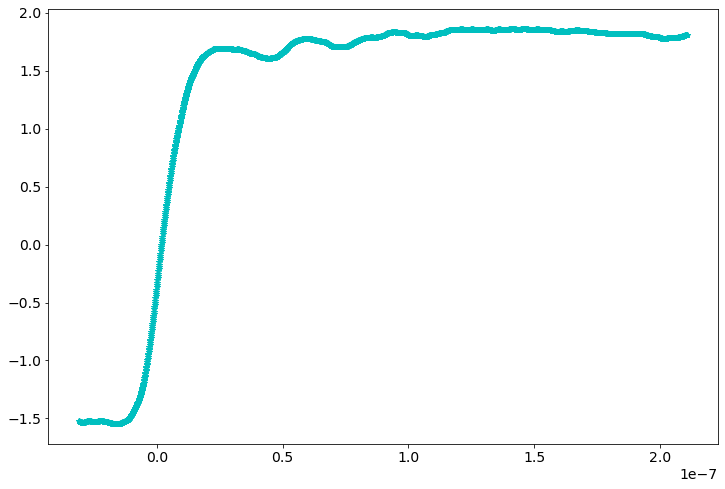

In [114]:
plt.plot('Time', 'new_col', '*-c',data =df)

           Time  Voltage  new_col
0           NaN      NaN      NaN
1           NaN      NaN      NaN
2 -3.890000e-08    -1.48      NaN
3 -3.880000e-08    -1.48      NaN
4 -3.870000e-08    -1.48      NaN
5 -3.860000e-08    -1.48      NaN
6 -3.850000e-08    -1.48      NaN
7 -3.840000e-08    -1.48      NaN
8 -3.830000e-08    -1.48      NaN
9 -3.820000e-08    -1.48      NaN


<AxesSubplot:>

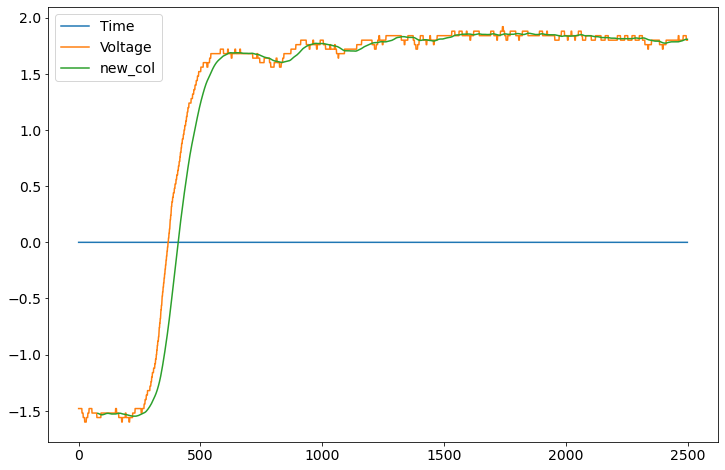

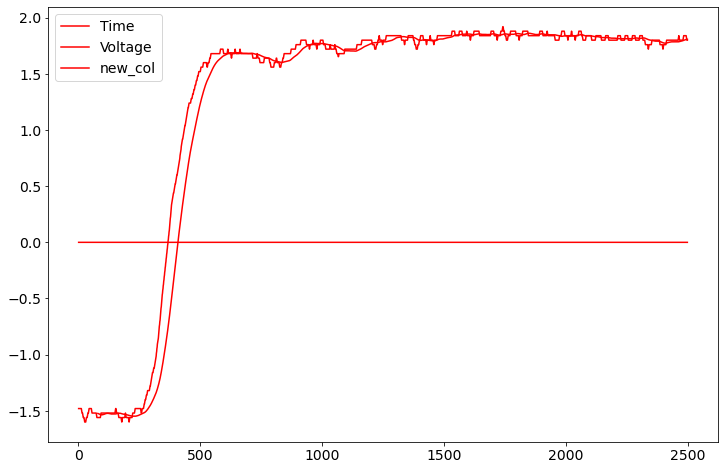

In [115]:

# Tail-rolling average transform
rolling = df.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
df.plot()
rolling_mean.plot(color='red')
#pyplot.show()